# Seattle Open City Data

In this notebook, we'll connect to a few open datasets for Seattle using the SODA API. We'll cover filtering and querying with the SODA API, and then eventually use Plotly to plot some key findings.

## Imports

In [137]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

%matplotlib inline

## Create a function to connect to city data and store in dataframe

In [138]:
def open_data_to_df(url, params=None):
    """ Input url and convert to Pandas dataframe"""
    request_object = requests.get(url, params)
    request_object_json = request_object.json()
    return pd.DataFrame([entry for entry in request_object_json])

___

### City of Seattle Wage Data
City Business: City of Seattle Wage Data: https://data.seattle.gov/City-Business/City-of-Seattle-Wage-Data/2khk-5ukd

https://data.seattle.gov/resource/ssah-h43e.json

Question: Which department has the higest/lowest average hourly rate?

**Data has a length of 1000, so I might need to increase the limit or the page number**

In [27]:
wages_url = 'https://data.seattle.gov/resource/ssah-h43e.json'
seattle_wages = open_data_to_df(wages_url)

# Convert hourly_rate column from string to float
seattle_wages['hourly_rate'] = pd.to_numeric(seattle_wages['hourly_rate'])
seattle_wages.head()

,department,first_name,hourly_rate,job_title,last_name
0,Police Department,Dag,50.38,Pol Ofcr-Detective,Aakervik
1,Police Department,George,48.86,Pol Ofcr-Patrl,Abed
2,Police Department,Clayton,48.86,Pol Ofcr-Patrl,Agate
3,Police Department,John,46.68,Pol Ofcr-Patrl,Allen
4,Police Department,Chris,48.86,Pol Ofcr-Patrl,Anderson


In [107]:
subset_wages = seattle_wages[['department', 'hourly_rate']]
subset_wages.head()

,department,hourly_rate
0,Police Department,50.38
1,Police Department,48.86
2,Police Department,48.86
3,Police Department,46.68
4,Police Department,48.86


In [219]:
# TRY THIS: reset index is exactly what I needed
# https://stackoverflow.com/questions/49116172/pulling-a-specific-value-from-a-pandas-groupby-object
test = subset_wages.groupby('department').median().sort_values('hourly_rate').reset_index()

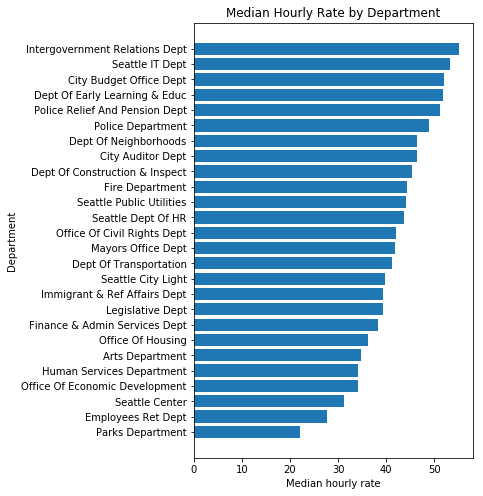

In [224]:
# THIS IS WHAT I WAS TRYING TO GET FOREVER BECAUSE I KNOW I CAN PASS THESE VALUES TO PLOTLY
plt.figure(figsize=(5,8))
plt.barh(test['department'], test['hourly_rate'])
plt.title('Median Hourly Rate by Department')
plt.ylabel('Department')
plt.xlabel('Median hourly rate');

In [125]:
test

,department,hourly_rate
0,Parks Department,22.1900
1,Employees Ret Dept,27.6900
2,Seattle Center,31.2600
3,Office Of Economic Development,34.0520
4,Human Services Department,34.0700
5,Arts Department,34.8650
6,Office Of Housing,36.1300
7,Finance & Admin Services Dept,38.2100
8,Legislative Dept,39.3003
9,Immigrant & Ref Affairs Dept,39.3580


In [136]:
# This is how plotly expects the data
test['department'].tolist()

['Parks Department',
 'Employees Ret Dept',
 'Seattle Center',
 'Office Of Economic Development',
 'Human Services Department',
 'Arts Department',
 'Office Of Housing',
 'Finance & Admin Services Dept',
 'Legislative Dept',
 'Immigrant & Ref Affairs Dept',
 'Seattle City Light',
 'Dept Of Transportation',
 'Mayors Office Dept',
 'Office Of Civil Rights Dept',
 'Seattle Dept Of HR',
 'Seattle Public Utilities',
 'Fire Department',
 'Dept Of Construction & Inspect',
 'City Auditor Dept',
 'Dept Of Neighborhoods',
 'Police Department',
 'Police Relief And Pension Dept',
 'Dept Of Early Learning & Educ',
 'City Budget Office Dept',
 'Seattle IT Dept',
 'Intergovernment Relations Dept']

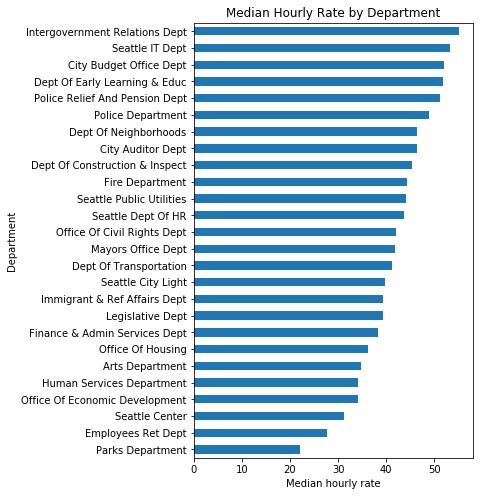

In [105]:
# Old way of plotting
# Plot median hourly rate by department
# df_one.sort_values('value', ascending=False, inplace=True)
seattle_wages.groupby(['department']).median().sort_values(by='hourly_rate').plot(kind='barh', \
                                                                                  legend=None, figsize=(5,8))
plt.title('Median Hourly Rate by Department')
plt.ylabel('Department')
plt.xlabel('Median hourly rate');

### Crime Data
Public Safety, Crime data: https://data.seattle.gov/Public-Safety/Crime-Data/4fs7-3vj5

API: https://data.seattle.gov/resource/xurz-654a.json

Question: Which neighborhoods have the most violent crime or largest amount of reported crime?

In [297]:
# This contains really old data, so need to filter reported_date to just 2018
crime_url = 'https://data.seattle.gov/resource/xurz-654a.json?$where=reported_date >= "2018-01-01" order by reported_date limit 50000'
seattle_crime = open_data_to_df(crime_url)
seattle_crime['reported_date'] = pd.to_datetime(seattle_crime['reported_date'])
seattle_crime.head()

,beat,crime_description,crime_subcategory,go_number,neighborhood,occ_datetime,occ_time,precinct,reported_date,reported_time,sector
0,B3,TRESPASS,TRESPASS,20180000534,WALLINGFORD,2018-01-01T00:00:00.000,1217,NORTH,2018-01-01,1217,B
1,F3,BURGLARY-FORCE-RES,BURGLARY-RESIDENTIAL,20180000666,HIGHLAND PARK,2017-12-29T00:00:00.000,2130,SOUTHWEST,2018-01-01,1421,F
2,M3,CHILD-OTHER,FAMILY OFFENSE-NONVIOLENT,20180000664,DOWNTOWN COMMERCIAL,2018-01-01T00:00:00.000,1419,WEST,2018-01-01,1419,M
3,M3,THEFT-SHOPLIFT,THEFT-SHOPLIFT,20180000840,DOWNTOWN COMMERCIAL,2018-01-01T00:00:00.000,1715,WEST,2018-01-01,1720,M
4,M3,THEFT-SHOPLIFT,THEFT-SHOPLIFT,20180000857,DOWNTOWN COMMERCIAL,2018-01-01T00:00:00.000,1500,WEST,2018-01-01,1742,M


In [296]:
seattle_crime.tail(3)

,beat,crime_description,crime_subcategory,go_number,neighborhood,occ_datetime,occ_time,precinct,reported_date,reported_time,sector
37648,M3,DISORDERLY CONDUCT,DISORDERLY CONDUCT,20180000358894,DOWNTOWN COMMERCIAL,2018-09-25T00:00:00.000,1622,WEST,2018-09-25,1622,M
37649,M3,NARC-SELL-METH,NARCOTIC,20180000358667,DOWNTOWN COMMERCIAL,2018-09-25T00:00:00.000,1335,WEST,2018-09-25,1335,M
37650,S2,ASSLT-AGG-GUN,AGGRAVATED ASSAULT,20180000357879,RAINIER BEACH,2018-09-25T00:00:00.000,30,SOUTH,2018-09-25,32,S


In [292]:
seattle_crime.dtypes

beat                         object
crime_description            object
crime_subcategory            object
go_number                    object
neighborhood                 object
occ_datetime                 object
occ_time                     object
precinct                     object
reported_date        datetime64[ns]
reported_time                object
sector                       object
dtype: object

In [293]:
len(seattle_crime)

37651

In [294]:
crime = seattle_crime[['crime_description', 'precinct']].groupby('crime_description').count().reset_index().sort_values('precinct', ascending=False)[:10]
crime.columns = ['crime_description', 'count']
crime

,crime_description,count
103,THEFT-CARPROWL,8539
110,THEFT-SHOPLIFT,3691
107,THEFT-OTH,3442
111,TRESPASS,2496
112,VEH-THEFT-AUTO,2494
18,BURGLARY-FORCE-RES,1413
102,THEFT-BUILDING,1379
22,BURGLARY-SECURE PARKING-RES,1207
20,BURGLARY-NOFORCE-RES,1205
17,BURGLARY-FORCE-NONRES,1190


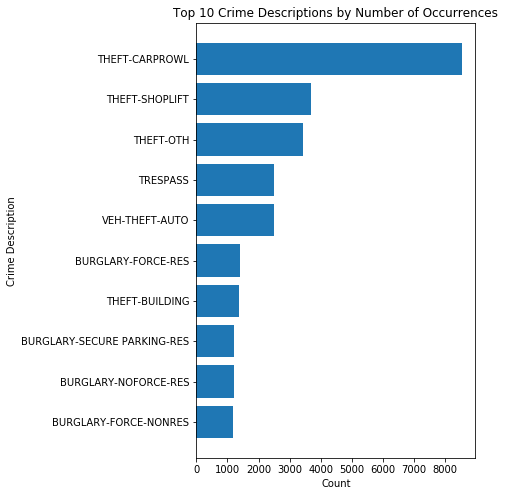

In [295]:
plt.figure(figsize=(5,8))
plt.barh(crime['crime_description'][::-1], crime['count'][::-1])
plt.title('Top 10 Crime Descriptions by Number of Occurrences')
plt.ylabel('Crime Description')
plt.xlabel('Count');

### Operating Budget
City of Seattle Operating Budget: https://data.seattle.gov/dataset/City-of-Seattle-Operating-Budget/8u2j-imqx

API: https://data.seattle.gov/resource/4fzy-5niz.json

Question: What is the annual operating budget for the city of Seattle? Where do they spend the most money?

In [204]:
# Using filtering
budget_url = 'https://data.seattle.gov/resource/4fzy-5niz.json?fiscal_year=2018'
seattle_budget = open_data_to_df(budget_url)
seattle_budget['approved_amount'] = pd.to_numeric(seattle_budget['approved_amount'])
seattle_budget.head()

,approved_amount,department,description,expense_category,expense_type,fiscal_year,fund,fund_type,program,service
0,35709706,Transportation,City Central Costs,City Central Costs,Operating Expense,2018,General Fund,Tax-Supported Fund,General Expense,Utilities & Transportation
1,31548714,Library,Programs and Services - Central and Branch Ope...,Programs and Services - Central and Branch Ope...,Operating Expense,2018,General Fund,Tax-Supported Fund,Library Programs and Services,"Arts, Culture & Recreation"
2,630000,Firefighters Pension,Administration,Administration,Operating Expense,2018,General Fund,Tax-Supported Fund,Firefighters' Pension,Public Safety
3,6749947,Construction and Inspections,Building Inspections,Building Inspections,Operating Expense,2018,General Fund,Tax-Supported Fund,Construction Inspections,Neighborhoods & Development
4,6576613,Planning and Community Development,Planning,Planning,Operating Expense,2018,General Fund,Tax-Supported Fund,Planning and Community Development,Neighborhoods & Development


In [215]:
seattle_budget[seattle_budget['department'] == 'City Light']

,approved_amount,department,description,expense_category,expense_type,fiscal_year,fund,fund_type,program,service
6,93579227,City Light,"Customer Service, Communications and Regulator...","Customer Service, Communications and Regulator...",Operating Expense,2018,General Fund,Tax-Supported Fund,"Customer Service, Communications and Regulator...",Utilities & Transportation
8,311102350,City Light,Long-Term Purchased Power,Long-Term Purchased Power,Operating Expense,2018,General Fund,Tax-Supported Fund,Long-Term Purchased Power,Utilities & Transportation
40,4163560,City Light,Financial Services - CIP,Financial Services - CIP,Operating Expense,2018,General Fund,Tax-Supported Fund,Financial Services - CIP,Utilities & Transportation
70,15027767,City Light,Administrative Services O&M,Administrative Services O&M,Operating Expense,2018,General Fund,Tax-Supported Fund,Administrative Services O&M,Utilities & Transportation
98,77299331,City Light,Transmission and Distribution O&M,Transmission and Distribution O&M,Operating Expense,2018,General Fund,Tax-Supported Fund,Transmission and Distribution O&M,Utilities & Transportation
107,98774281,City Light,Taxes,Taxes,Operating Expense,2018,General Fund,Tax-Supported Fund,Taxes,Utilities & Transportation
115,40406121,City Light,Short-Term Purchased Power,Short-Term Purchased Power,Operating Expense,2018,General Fund,Tax-Supported Fund,Short-Term Purchased Power,Utilities & Transportation
149,24331728,City Light,Engineering and Technology Innovation O&M,Engineering and Technology Innovation O&M,Operating Expense,2018,General Fund,Tax-Supported Fund,Engineering and Technology Innovation O&M,Utilities & Transportation
163,110989474,City Light,Transmission and Distribution - CIP,Transmission and Distribution - CIP,Operating Expense,2018,General Fund,Tax-Supported Fund,Transmission and Distribution - CIP,Utilities & Transportation
172,93905434,City Light,Power Supply & Environmental Affairs - CIP,Power Supply & Environmental Affairs - CIP,Operating Expense,2018,General Fund,Tax-Supported Fund,Power Supply & Environmental Affairs - CIP,Utilities & Transportation


In [229]:
# Seattle's 2018 budget is $6B
print("Seattle's 2018 budget is $", seattle_budget['approved_amount'].sum())

Seattle's 2018 budget is $ 6009434024


In [213]:
seattle_budget_top_10 = seattle_budget[['department', 'approved_amount']].groupby('department').sum() \
                .reset_index().sort_values('approved_amount', ascending=False)[:10]
seattle_budget_top_10

,department,approved_amount
6,City Light,1409510990
46,Public Utilities,1167669094
20,Finance General,541389234
52,Transportation,477874991
44,Police,331321865
42,Personnel Compensation Trust Funds,263889348
29,Information Technology,253008449
22,Fire,212163674
21,Finance and Administrative Services,206486268
27,Human Services,176512901


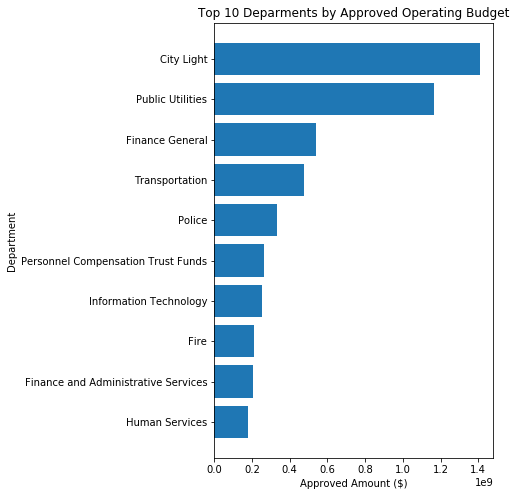

In [216]:
plt.figure(figsize=(5,8))
plt.barh(seattle_budget_top_10['department'][::-1], seattle_budget_top_10['approved_amount'][::-1])
plt.title('Top 10 Deparments by Approved Operating Budget')
plt.ylabel('Department')
plt.xlabel('Approved Amount ($)');

### Chart 4: How overall city budget has grown over the last several years

In [258]:
# Increase limit from default of 1000
budget_ts_url = 'https://data.seattle.gov/resource/4fzy-5niz.json?$limit=10000'
seattle_budget_ts = open_data_to_df(budget_ts_url)
seattle_budget_ts['approved_amount'] = pd.to_numeric(seattle_budget_ts['approved_amount'])
seattle_budget_ts.head()

,approved_amount,department,description,expense_category,expense_type,fiscal_year,fund,fund_type,program,recommended_amount,service
0,NaN,2008 Parks Levy,2008 Parks Levy Fund Program,2008 Parks Levy Fund Program,Operating Expense,2013,General Fund,Tax-Supported Fund,2008 Parks Levy Fund BCL-1,0,"Arts, Culture & Recreation"
1,0.0,2008 Parks Levy,Support to Multi-Purpose Trails,Support to Multi-Purpose Trails,Operating Expense,2011,General Fund,Tax-Supported Fund,Support to Multi-Purpose Trails,0,"Arts, Culture & Recreation"
2,3500000.0,2008 Parks Levy,Support to Multi-Purpose Trails,Support to Multi-Purpose Trails,Operating Expense,2010,General Fund,Tax-Supported Fund,Support to Multi-Purpose Trails,0,"Arts, Culture & Recreation"
3,13139976.0,2012 Library Levy,Library Levy Operating Transfer,Library Levy Operating Transfer,Operating Expense,2015,General Fund,Tax-Supported Fund,Library Levy Operating Transfer,0,"Arts, Culture & Recreation"
4,12421257.0,2012 Library Levy,Library Levy Operating Transfer,Library Levy Operating Transfer,Operating Expense,2014,General Fund,Tax-Supported Fund,Library Levy Operating Transfer,0,"Arts, Culture & Recreation"


In [259]:
# How to get back more than 1000 results from API?
len(seattle_budget_ts)

5540

## 3 Ways to Filter SODA API results
- Adding to the end of URL with ? and & to separate additional filters
- Using SoQL
- Using a payload to separate the filters into a highly readable dictionary

### Payload Example

We can filter the results in a few ways. One is by adding '?<column_name>=<value>' to the end of the URL. Another way is to separate the filter in a dictionary, and then pass that dictionary to requests.get.

In [15]:
payload = {'first_name': 'George', 'department': 'Police Department'}

# Pass the payload as the second argument to the function
seattle_wages_payload = open_data_to_df(wages_url, params=payload)
seattle_wages_payload.head()

,department,first_name,hourly_rate,job_title,last_name
0,Police Department,George,48.86,Pol Ofcr-Patrl,Abed
1,Police Department,George,55.95,Pol Sgt-Detective-Homicide,Davisson II
2,Police Department,George,49.29,Pol Ofcr-Patrl,Hissung Jr
3,Police Department,George,81.63,Pol Lieut,Bray Jr
4,Police Department,George,35.97,Parking Enf Ofcr Supv,Murray


### SoQL Example

In [300]:
budget_ts_url = 'https://data.seattle.gov/resource/4fzy-5niz.json?$where=fiscal_year in (2015, 2016, 2017, 2018)'
seattle_budget_ts = open_data_to_df(budget_ts_url)
seattle_budget_ts['approved_amount'] = pd.to_numeric(seattle_budget_ts['approved_amount'])
seattle_budget_ts.head()

,approved_amount,department,description,expense_category,expense_type,fiscal_year,fund,fund_type,program,recommended_amount,service
0,13139976,2012 Library Levy,Library Levy Operating Transfer,Library Levy Operating Transfer,Operating Expense,2015,General Fund,Tax-Supported Fund,Library Levy Operating Transfer,0,"Arts, Culture & Recreation"
1,652869,Arts and Culture,Administrative Services,Administrative Services,Operating Expense,2015,General Fund,Tax-Supported Fund,Arts Account,0,"Arts, Culture & Recreation"
2,616223,Arts and Culture,Community Development and Outreach,Community Development and Outreach,Operating Expense,2015,General Fund,Tax-Supported Fund,Arts Account,0,"Arts, Culture & Recreation"
3,3810876,Arts and Culture,Cultural Partnerships,Cultural Partnerships,Operating Expense,2015,General Fund,Tax-Supported Fund,Arts Account,0,"Arts, Culture & Recreation"
4,875117,Arts and Culture,Langston Hughes Performing Arts Institute,Langston Hughes Performing Arts Institute,Operating Expense,2015,General Fund,Tax-Supported Fund,Arts Account,0,"Arts, Culture & Recreation"
